Importer les données à l'aide de la bibliothèque Pandas.

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df =  pd.read_csv("assurance-maladie.csv")

print(df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Comprendre la structure générale du jeu de données (types de données, dimensions, aperçus).

In [5]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
numeriques = df.select_dtypes(include=["int64", "float64"])
print(numeriques.median())

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


In [7]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [8]:
categoriques = df.select_dtypes(include=["object", "float64"])
print(categoriques.describe())

               bmi       charges
count  1338.000000   1338.000000
mean     30.663397  13270.422265
std       6.098187  12110.011237
min      15.960000   1121.873900
25%      26.296250   4740.287150
50%      30.400000   9382.033000
75%      34.693750  16639.912515
max      53.130000  63770.428010


In [9]:
for i in categoriques :
    freq = df.groupby([i]).count()
    print(freq["age"])


sex
female    662
male      676
Name: age, dtype: int64
bmi
15.960    1
16.815    2
17.195    1
17.290    3
17.385    1
         ..
48.070    1
49.060    1
50.380    1
52.580    1
53.130    1
Name: age, Length: 548, dtype: int64
smoker
no     1064
yes     274
Name: age, dtype: int64
region
northeast    324
northwest    325
southeast    364
southwest    325
Name: age, dtype: int64
charges
1121.87390     1
1131.50660     1
1135.94070     1
1136.39940     1
1137.01100     1
              ..
55135.40209    1
58571.07448    1
60021.39897    1
62592.87309    1
63770.42801    1
Name: age, Length: 1337, dtype: int64


In [10]:
NullCount = df.isnull().sum()
print(NullCount)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
Duplicated = df.duplicated(subset=["sex"])
print(Duplicated)

0       False
1       False
2        True
3        True
4        True
        ...  
1333     True
1334     True
1335     True
1336     True
1337     True
Length: 1338, dtype: bool


In [12]:
print("Nombre de doublons :", df.duplicated().sum())

print(df[df.duplicated(keep=False)])


Nombre de doublons : 1
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [13]:

print(df[df.isnull().any(axis = 1)])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn).


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
numeriques = df.select_dtypes(include=["int64", "float64"])

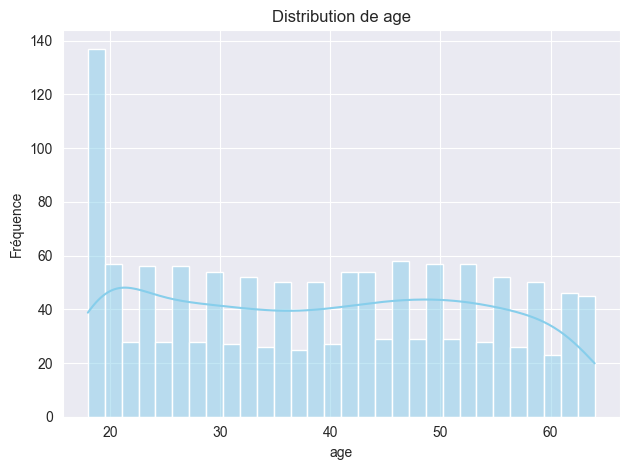

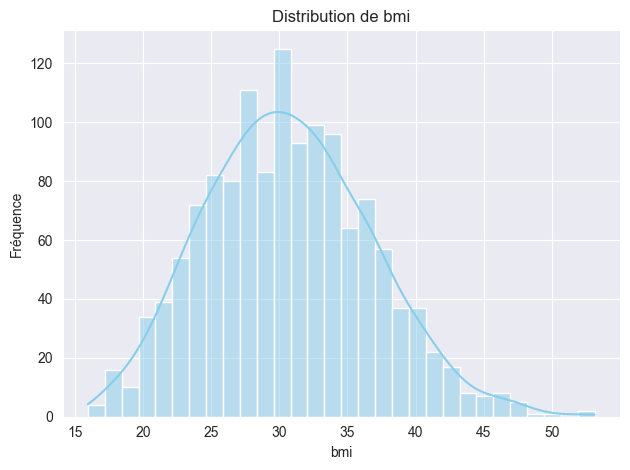

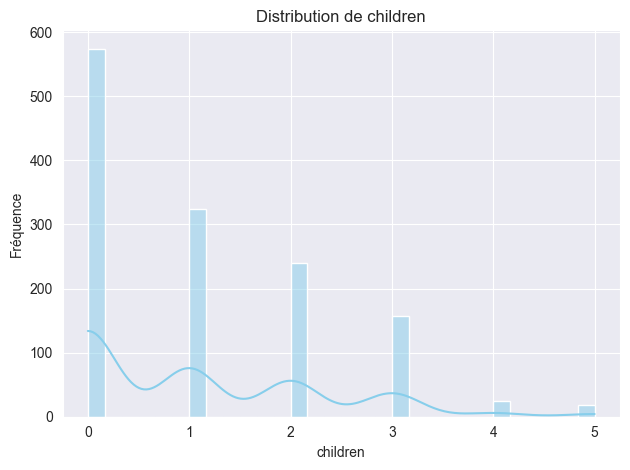

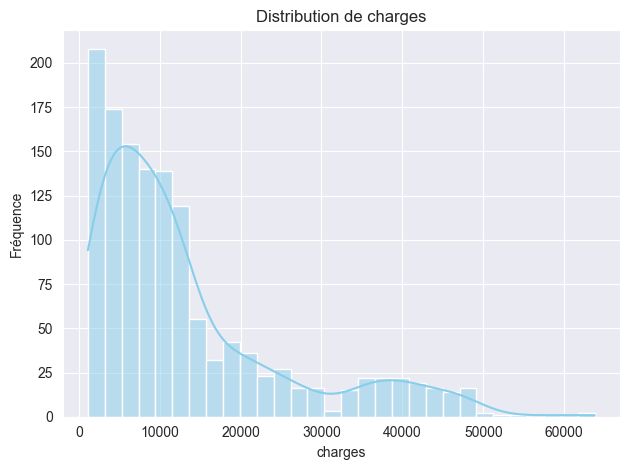

In [15]:
for col in numeriques.columns:
    plt.show()
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


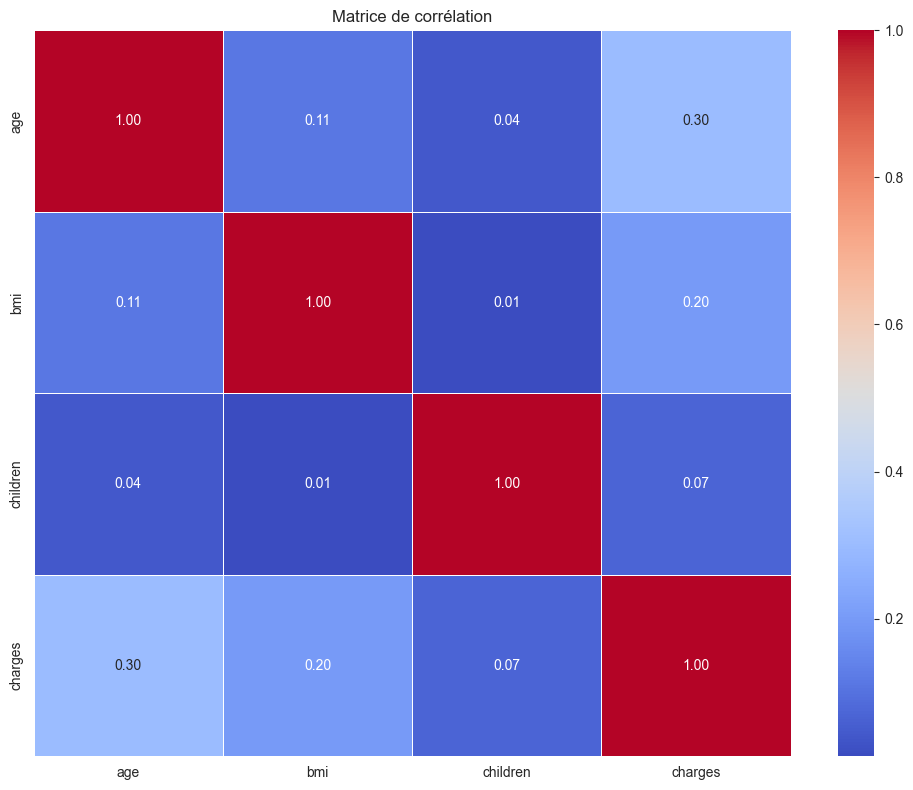

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

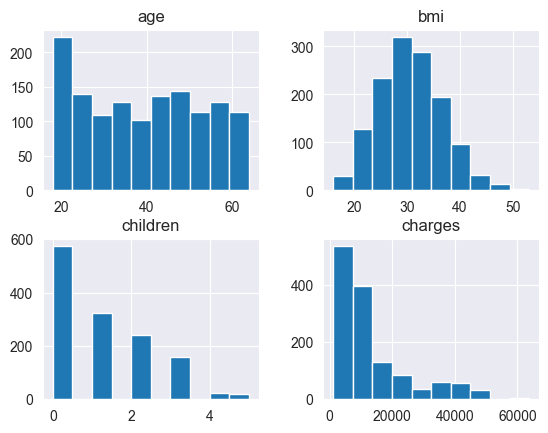

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()
df.hist()

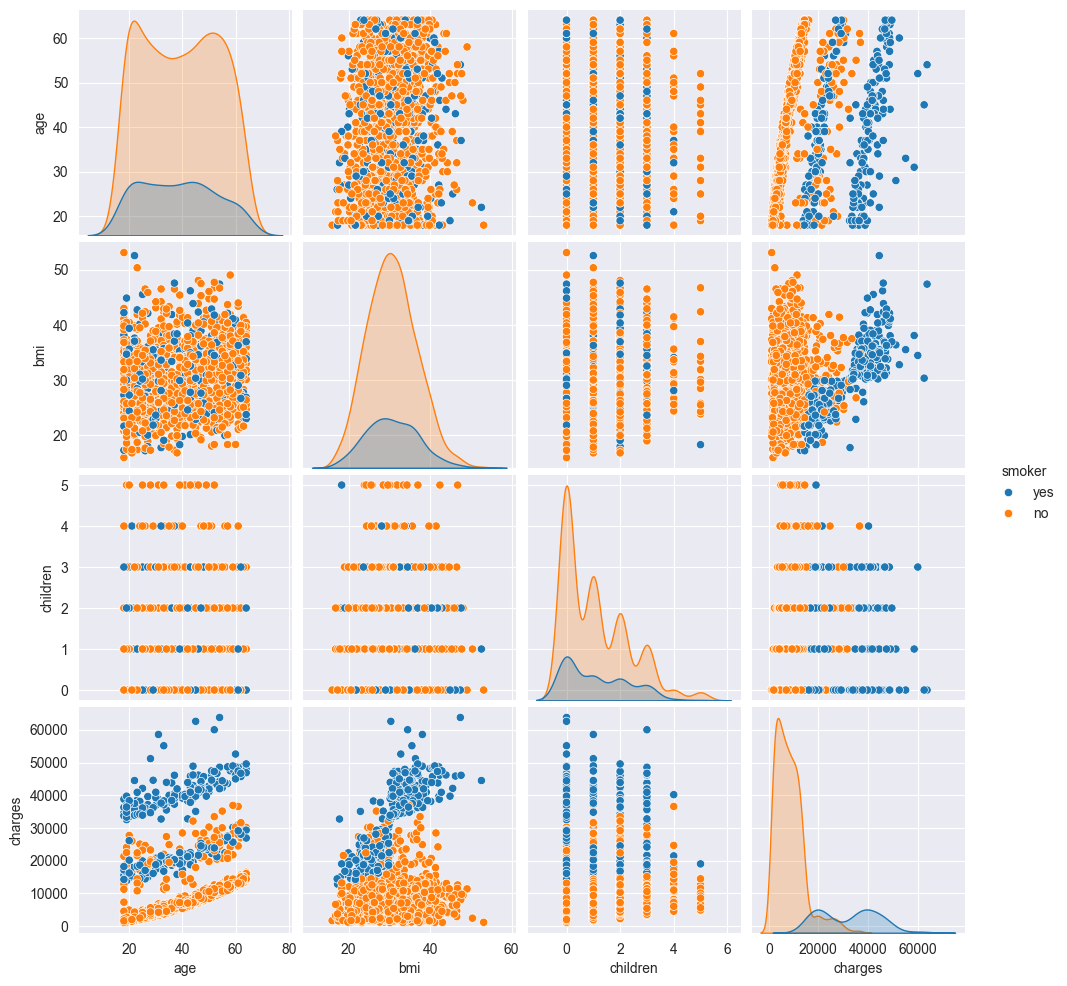

In [23]:
sns.pairplot(df[["age","bmi","children","charges","smoker"]],hue="smoker")

In [19]:
strong_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print(strong_corr)

          age  bmi  children  charges
age       1.0  NaN       NaN      NaN
bmi       NaN  1.0       NaN      NaN
children  NaN  NaN       1.0      NaN
charges   NaN  NaN       NaN      1.0


In [20]:
import statistics
for i in numeriques :
    mediane = df[i].median()
    df.loc[:, i] = df[i].fillna(mediane)
for i in categoriques :
    statistics.mode(df)


Suppression des doublons.

In [24]:
print("Nombre de doublons :", df.duplicated().sum())

print(df[df.duplicated()].index[0])
df.drop(index=df[df.duplicated()].index[0], inplace=True)


Nombre de doublons : 1
581
